In [90]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import randomized_svd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re # removing the special character and link from the text
import string 


KeyboardInterrupt: 

In [2]:

dfTrue = pd.read_csv('C:/Users/yjk93/OneDrive/문서/Cpts315/FinalProject/True.csv')
dfFake = pd.read_csv('C:/Users/yjk93/OneDrive/문서/Cpts315/FinalProject/Fake.csv')

In [3]:
dfFake["class"] = 0
dfTrue["class"] = 1

In [4]:
dfFakeManualTest = dfFake.tail(10)
for line in range(23480, 23470, -1):
    dfFake.drop([line], axis=0, inplace=True)

dfTrueManualTest = dfTrue.tail(10)
for line in range(21416,21406, -1):
    dfTrue.drop([line], axis=0, inplace=True)

In [5]:
dfFake.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [6]:
dfMerge = pd.concat([dfFake, dfTrue], axis=0)

In [7]:
df = dfMerge.drop(["title", "subject", "date"], axis=1)

In [8]:
df = df.sample(frac=1)

In [9]:
df.head(10)

,text,class
1577,"Ever since Donald Trump won the election, Repu...",0
2905,"On Sunday morning, Donald Trump took to Twitte...",0
13884,RIYADH (Reuters) - The chief negotiator of Syr...,1
12537,The man running Hillary Clinton s campaign is ...,0
12190,43 days and counting Characterizing the milita...,0
11158,"HARRISBURG, Pa. (Reuters) - The city council o...",1
3674,WASHINGTON (Reuters) - In the Trump White Hous...,1
10451,Mayor Bill de Blasio on Thursday skipped an NY...,0
21507,"So, the working people of America are basicall...",0
6554,"PALM BEACH, Fla. (Reuters) - U.S. President-el...",1


In [10]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [94]:
df["text"] = df["text"].apply(word_drop)
print(df["text"])

1577     ever since donald trump won the election  repu...
2905     on sunday morning  donald trump took to twitte...
13884    riyadh  reuters    the chief negotiator of syr...
12537    the man running hillary clinton s campaign is ...
12190     days and counting characterizing the military...
                               ...                        
21584                                                     
23435    patrick henningsen  century wireas baron roths...
20754    this one meme tells you everything you need to...
17802    batman fans who have been looking forward to t...
1        washington  reuters    transgender people will...
Name: text, Length: 44878, dtype: object


In [12]:
x = df["text"]
y = df["class"]

In [13]:
xTrain, xTest, yTrain,yTest = train_test_split(x,y, test_size=.25)

In [14]:
vectorization = TfidfVectorizer()
xvTrain = vectorization.fit_transform(xTrain)
xvTest = vectorization.transform(xTest)

In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(xvTrain, yTrain)

LogisticRegression()

In [16]:
print(LR.score(xvTest, yTest))

0.9871657754010695


In [17]:
predictLR = LR.predict(xvTest)

In [18]:
print(classification_report(yTest, predictLR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5806
           1       0.99      0.99      0.99      5414

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xvTrain, yTrain)

DecisionTreeClassifier()

In [20]:
print(DT.score(xvTest, yTest))

0.9954545454545455


In [21]:
predDT = DT.predict(xvTest)

In [22]:
print(classification_report(yTest, predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5806
           1       1.00      1.00      1.00      5414

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [41]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)

GBC.fit(xvTrain, yTrain)

GradientBoostingClassifier(random_state=0)

In [42]:
print(GBC.score(xvTest, yTest))

0.9961675579322639


In [43]:
predGBC = GBC.predict(xvTest)

In [44]:
print(classification_report(yTest, predGBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5806
           1       0.99      1.00      1.00      5414

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [45]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)

RFC.fit(xvTrain, yTrain)

RandomForestClassifier(random_state=0)

In [46]:
print(RFC.score(xvTest, yTest))

0.9915329768270945


In [47]:
predRFC = RFC.predict(xvTest)

In [48]:
print(classification_report(yTest, predRFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5806
           1       0.99      0.99      0.99      5414

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



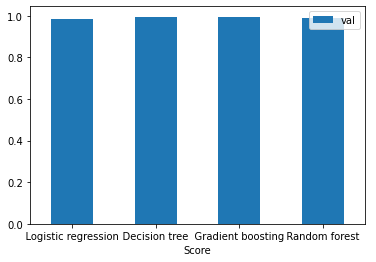

In [63]:
graph = pd.DataFrame({'Score' : ['    Logistic regression    ', '    Decision tree    ', '    Gradient boosting    ', '   Random forest   '], 'val':[LR.score(xvTest, yTest),DT.score(xvTest, yTest),GBC.score(xvTest, yTest),RFC.score(xvTest, yTest)]})

ax = graph.plot.bar(x = 'Score', y = 'val', rot = 0)

In [71]:
predLR = LR.predict(xvTest)

In [72]:
print(predLR)

[1 1 1 ... 1 0 1]


In [73]:
print(predDT)

[1 1 1 ... 1 0 1]


In [74]:
print(xvTest)

  (0, 216)	0.10419264289465292
  (0, 287)	0.020420103527409066
  (0, 350)	0.03871184313106843
  (0, 409)	0.03246779470468941
  (0, 638)	0.028863149666709904
  (0, 908)	0.023395338694545943
  (0, 1429)	0.02037546173441291
  (0, 2529)	0.02626474215457704
  (0, 2856)	0.031732866530794886
  (0, 2870)	0.029778966277089973
  (0, 2880)	0.01760060780012387
  (0, 3079)	0.00839661262492507
  (0, 3182)	0.09383077755937291
  (0, 3490)	0.02112394183237015
  (0, 3740)	0.0129769202263365
  (0, 4253)	0.04423376895607085
  (0, 4480)	0.01708488336938914
  (0, 4646)	0.031192080551487106
  (0, 5483)	0.22111052635795278
  (0, 5502)	0.2862356899918119
  (0, 5513)	0.04694766783269676
  (0, 5515)	0.09074530209556499
  (0, 6251)	0.04189664968059135
  (0, 6792)	0.03599424772569432
  (0, 7220)	0.03248394641380459
  :	:
  (11219, 85208)	0.02786770144979273
  (11219, 85628)	0.0816202010180022
  (11219, 86331)	0.01557723340340477
  (11219, 87927)	0.06739330314079839
  (11219, 88121)	0.05621000066746743
  (11219, 88

In [76]:
print(yTest)

5512     1
17255    1
14971    1
15577    0
6444     0
        ..
14564    0
12708    0
18031    1
17000    0
6568     1
Name: class, Length: 11220, dtype: int64


In [78]:
print(xTrain)

18367    berlin  reuters    it is important for spain t...
11395    activist judges are killing america  the judge...
22147     century wire says can you say   out of touch ...
19687    are the most criminal  brazen and crooked grou...
14549    seoul  reuters    south korea and the united s...
                               ...                        
12141    toronto  reuters    canadian police said they ...
1945     when one votes for someone with a  d  next to ...
1322     washington  reuters    nfl team owners will co...
4312     earlier today  an audio recording surfaced of ...
11960                                                     
Name: text, Length: 33658, dtype: object


In [79]:
print(xTest)

5512      tokyo detroit  reuters    when japanese prime...
17255    madrid  reuters    the detention of catalan ac...
14971    nairobi  reuters    kenya s police monitor sai...
15577    you can t make this up  why are these criminal...
6444     cliven bundy and his unstable group of family ...
                               ...                        
14564    adding insult to injury is what obama does bes...
12708                                                     
18031    london  reuters    a woman who tried to scale ...
17000    wasn t the point of obamacare to provide healt...
6568     washington  reuters    democrats on the u s  s...
Name: text, Length: 11220, dtype: object


In [80]:
print(yTrain)

18367    1
11395    0
22147    0
19687    0
14549    1
        ..
12141    1
1945     0
1322     1
4312     0
11960    0
Name: class, Length: 33658, dtype: int64


In [81]:
print(yTest)

5512     1
17255    1
14971    1
15577    0
6444     0
        ..
14564    0
12708    0
18031    1
17000    0
6568     1
Name: class, Length: 11220, dtype: int64


In [82]:
print(xvTrain)

  (0, 764)	0.07179151878780085
  (0, 883)	0.06581317577194769
  (0, 960)	0.17592678190863106
  (0, 3079)	0.05941223008913719
  (0, 3182)	0.06639219879278237
  (0, 3296)	0.10473055627058608
  (0, 3740)	0.04591064306377732
  (0, 4646)	0.05517674654844491
  (0, 7933)	0.10561897902050468
  (0, 8147)	0.05412176023609267
  (0, 12172)	0.0422367551894316
  (0, 12920)	0.24901776276283996
  (0, 13692)	0.20838825300596567
  (0, 15404)	0.09900920159405545
  (0, 16685)	0.1188398504838851
  (0, 16821)	0.0861252130957707
  (0, 17121)	0.08672151268192305
  (0, 20227)	0.11672532342073806
  (0, 20235)	0.08285723527127611
  (0, 20838)	0.05645138208848654
  (0, 21270)	0.11199582859588365
  (0, 21582)	0.1257764345568608
  (0, 26854)	0.09194361065473156
  (0, 30090)	0.048616745309668134
  (0, 30923)	0.028948215823059408
  :	:
  (33656, 90043)	0.049064335128486014
  (33656, 91052)	0.021986003473669
  (33656, 91198)	0.05302393234777582
  (33656, 91215)	0.01815120597016625
  (33656, 91384)	0.040652052411280816

In [83]:
print(xvTest)

  (0, 216)	0.10419264289465292
  (0, 287)	0.020420103527409066
  (0, 350)	0.03871184313106843
  (0, 409)	0.03246779470468941
  (0, 638)	0.028863149666709904
  (0, 908)	0.023395338694545943
  (0, 1429)	0.02037546173441291
  (0, 2529)	0.02626474215457704
  (0, 2856)	0.031732866530794886
  (0, 2870)	0.029778966277089973
  (0, 2880)	0.01760060780012387
  (0, 3079)	0.00839661262492507
  (0, 3182)	0.09383077755937291
  (0, 3490)	0.02112394183237015
  (0, 3740)	0.0129769202263365
  (0, 4253)	0.04423376895607085
  (0, 4480)	0.01708488336938914
  (0, 4646)	0.031192080551487106
  (0, 5483)	0.22111052635795278
  (0, 5502)	0.2862356899918119
  (0, 5513)	0.04694766783269676
  (0, 5515)	0.09074530209556499
  (0, 6251)	0.04189664968059135
  (0, 6792)	0.03599424772569432
  (0, 7220)	0.03248394641380459
  :	:
  (11219, 85208)	0.02786770144979273
  (11219, 85628)	0.0816202010180022
  (11219, 86331)	0.01557723340340477
  (11219, 87927)	0.06739330314079839
  (11219, 88121)	0.05621000066746743
  (11219, 88

In [87]:
def output_label(n):
    if n ==0:
        return "Fake News"
    elif n == 1:
        return "Not a Fake News"


Enter the News Text: Patrick Henningsen  21st Century WireRemember when the Obama Administration told the world how it hoped to identify 5,000 reliable non-jihadist  moderate  rebels hanging out in Turkey and Jordan, who might want to fight for Washington in Syria? After all the drama over its infamous  train and equip  program to create their own Arab army in Syria, they want to give it another try.This week, Pentagon officials announced their new plan to train up to 7,000 more  moderate  fighters, but this time the project would take place inside Syria (and to hell with international law).We re told that this was requested by Ankara, and with all NATO allies singing the same hymn   claiming that this new effort will help in securing Turkey s porous border with Syria, or so the story goes. Washington s political cover for this is fashioned from the popular post-Paris theme: to protect civilized Europe from invading hordes and the terrorists who hide among them, as stated in the Wall S

AttributeError: 'list' object has no attribute 'take'

In [91]:

def manual_testing(news):
    testingNews = {"text":[news]}
    newdeftest = pd.DataFrame(testingNews)
    newdeftest["text"] = newdeftest["text"].apply(word_drop)
    newxtest = newdeftest["text"]
    newxvtest = vectorization.transform(newxtest)
    predLR = LR.predict(newxvtest)
    predDT = DT.predict(newxvtest)
    predGBC = GBC.predict(newxvtest)
    predRFC = RFC.predict(newxvtest)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction {}".format(output_label(predLR),
    output_label(predDT),
    output_label(predGBC),
    output_label(predRFC)))

In [92]:
news = str(input("Enter the News Text: "))
manual_testing(news)


Enter the News Text: 21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three o

AttributeError: 'list' object has no attribute 'take'